##### scikit-learn (or sklearn) is a popular Python library for machine learning. It has easy-to-use tools for text processing — including Bag of Words

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('../data/spam.csv')

In [3]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
df.Category.value_counts()/len(df)*100

Category
ham     86.593683
spam    13.406317
Name: count, dtype: float64

In [6]:
df['spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [7]:
df.head(5)

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
new_df = pd.read_csv('../data/spam.csv')

In [10]:
new_df.head(5)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.head(5)

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
df.shape

(5572, 3)

### Train test split

🧠 What is train_test_split?
- When building a machine learning model, you need to:

- Train the model on one part of the data

- Test it on another part (that the model hasn't seen)

- train_test_split helps you do this easily.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam,test_size=0.2)

In [14]:
X_train.shape

(4457,)

In [15]:
X_test.shape

(1115,)

In [16]:
X_train[:4]

839     We tried to contact you re our offer of New Vi...
4095                             how are you? I miss you!
4692    Surly ill give it to you:-) while coming to re...
943     How about getting in touch with folks waiting ...
Name: Message, dtype: object

In [17]:
y_train[:4]

839     1
4095    0
4692    0
943     1
Name: spam, dtype: int64

#### **Create bag of words representation using CountVectorizer**

In [18]:
v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_test_cv = v.transform(X_test)

In [19]:
X_train_cv

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 58933 stored elements and shape (4457, 7704)>

In [20]:
X_train_cv.toarray()[:2][0]

array([0, 0, 0, ..., 0, 0, 0], shape=(7704,))

In [21]:
X_train_cv.shape

(4457, 7704)

In [22]:
v.get_feature_names_out()[1771]

'cheer'

In [23]:
v.vocabulary_

{'we': 7377,
 'tried': 7000,
 'to': 6897,
 'contact': 1985,
 'you': 7668,
 're': 5573,
 'our': 5005,
 'offer': 4891,
 'of': 4884,
 'new': 4749,
 'video': 7245,
 'phone': 5184,
 '750': 616,
 'anytime': 1005,
 'any': 997,
 'network': 4741,
 'mins': 4496,
 'half': 3299,
 'price': 5391,
 'rental': 5690,
 'camcorder': 1631,
 'call': 1612,
 '08000930705': 50,
 'or': 4971,
 'reply': 5704,
 'for': 2937,
 'delivery': 2248,
 'wed': 7392,
 'how': 3523,
 'are': 1053,
 'miss': 4509,
 'surly': 6605,
 'ill': 3617,
 'give': 3136,
 'it': 3763,
 'while': 7453,
 'coming': 1921,
 'review': 5754,
 'about': 762,
 'getting': 3119,
 'in': 3645,
 'touch': 6959,
 'with': 7510,
 'folks': 2919,
 'waiting': 7319,
 'company': 1932,
 'just': 3876,
 'txt': 7054,
 'back': 1200,
 'your': 7673,
 'name': 4682,
 'and': 966,
 'age': 863,
 'opt': 4965,
 'enjoy': 2602,
 'the': 6783,
 'community': 1928,
 '150p': 306,
 'sms': 6245,
 'well': 7417,
 'then': 6795,
 'have': 3353,
 'great': 3229,
 'weekend': 7402,
 'happy': 3332,
 

In [24]:
X_train_np = X_train_cv.toarray()
X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0], shape=(7704,))

In [25]:
np.where(X_train_np[0]!=0)

(array([  50,  616,  997, 1005, 1612, 1631, 1985, 2248, 2937, 3299, 4496,
        4741, 4749, 4884, 4891, 4971, 5005, 5184, 5391, 5573, 5690, 5704,
        6897, 7000, 7245, 7377, 7392, 7668]),)

## Count Vectorizer

In [32]:
# if you don't want to run all your cleaning code again, just load in the pickle file
series = pd.read_pickle('../data/text_clean.pkl')
series

0                    life lemon lemonade
1                     lemon maven market
2            dozen lemon gallon lemonade
3    lemon lemon lemon lemon lemon lemon
4              s market lemon sale today
5        maven market eureka lemon lemon
6           palmer lemonade half ice tea
7                       ice tea favorite
Name: sentence, dtype: object

In [33]:
# basic count vectorizer code
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
dtm = cv.fit_transform(series)
dtm_df = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
dtm_df

,dozen,eureka,favorite,gallon,half,ice,lemon,lemonade,life,market,maven,palmer,sale,tea,today
0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
2,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
5,0,1,0,0,0,0,2,0,0,1,1,0,0,0,0
6,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0
7,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [34]:
# count vectorizer code with parameter tweaks
cv2 = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=2, max_df=.8)
dtm2 = cv2.fit_transform(series)
dtm_df2 = pd.DataFrame(dtm2.toarray(), columns=cv2.get_feature_names_out())
dtm_df2

,ice,ice tea,lemon,lemon lemon,lemonade,market,maven,maven market,tea
0,0,0,1,0,1,0,0,0,0
1,0,0,1,0,0,1,1,1,0
2,0,0,1,0,1,0,0,0,0
3,0,0,6,5,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0
5,0,0,2,1,0,1,1,1,0
6,1,1,0,0,1,0,0,0,1
7,1,1,0,0,0,0,0,0,1


### Quick EDA with Count Vectorizer

In [35]:
# return the most common terms
term_freq = dtm_df2.sum()
term_freq

ice              2
ice tea          2
lemon           12
lemon lemon      6
lemonade         3
market           3
maven            2
maven market     2
tea              2
dtype: int64

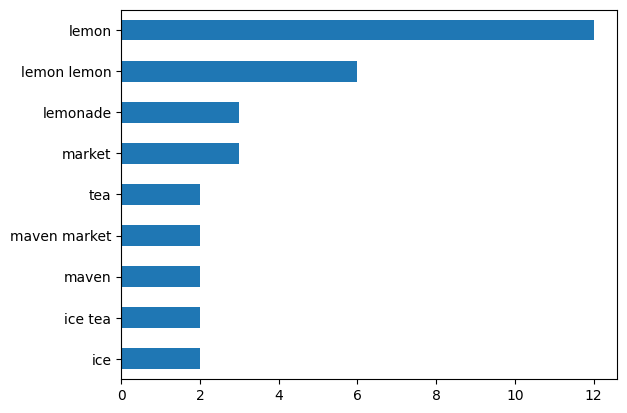

In [38]:
#!pip install matplotlib

# visualize the most common words
term_freq.sort_values().plot(kind='barh');

#### **Naive Bayes Classifier**

🧠 What is Naive Bayes?
Naive Bayes is a fast and simple classification algorithm based on Bayes' Theorem. It's called "naive" because it assumes that all features (like words) are independent of each other — which is usually not true, but the model still works surprisingly well in many cases!

📦 Where is it used?
Spam detection

Sentiment analysis

Text classification (e.g., topic detection)

Email filtering

🧠 What is MultinomialNB?

MultinomialNB stands for Multinomial Naive Bayes.

It's a machine learning algorithm that works well for:

Text classification

Spam detection

Sentiment analysis

It uses word counts (like Bag of Words) or TF-IDF scores to make predictions.

In [26]:
model = MultinomialNB()
model.fit(X_train_cv, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [27]:
y_pred = model.predict(X_test_cv)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       972
           1       0.97      0.92      0.94       143

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



#### **Test on a random datapoint**

In [29]:
message = {"Upto 20% off on parking, exclusing offer just for you"}

In [30]:
message_cnt = v.transform(message)

model.predict(message_cnt)

array([0])